In [39]:
import pandas as pd

names = pd.read_csv("/Users/kritinshanmugam/Desktop/names.csv", header=None)
names_list = names.iloc[:, 0].tolist()

X = pd.read_csv("/Users/kritinshanmugam/Desktop/genes.csv", header=None, names=names_list)
y = pd.read_csv("/Users/kritinshanmugam/Desktop/labels.csv", header=None, names = ['Label'])

print(X.head())
print(X.shape)


   0610007P14Rik  0610009B22Rik  0610009L18Rik  0610009O20Rik  0610010F05Rik  \
0       1.387721            0.0            0.0            0.0            0.0   
1       0.000000            0.0            0.0            0.0            0.0   
2       0.000000            0.0            0.0            0.0            0.0   
3       0.000000            0.0            0.0            0.0            0.0   
4       0.000000            0.0            0.0            0.0            0.0   

   0610012D04Rik  0610012G03Rik  0610025J13Rik  0610030E20Rik  0610031O16Rik  \
0            0.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   ...    mt-Co2    mt-Co3   mt-Cytb  

In [38]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# function to find the key of the value when label encoding the classes
def key_find(classes, pred):
    for key, val in classes.items():
        if pred == val:
            return key
        
          
label_encoder = LabelEncoder()

# Handle missing values
X = X.dropna()
y = y.dropna()

# Standardize features
X = (X - X.mean()) / X.std()

# Create copy of original (untransformed) y data to compare later with predictions
y_orig = y.copy()

print(X.head())


   0610007P14Rik  0610009B22Rik  0610009L18Rik  0610009O20Rik  0610010F05Rik  \
0       6.357779      -0.129192      -0.133012      -0.339486      -0.441585   
1      -0.177072      -0.129192      -0.133012      -0.339486      -0.441585   
2      -0.177072      -0.129192      -0.133012      -0.339486      -0.441585   
3      -0.177072      -0.129192      -0.133012      -0.339486      -0.441585   
4      -0.177072      -0.129192      -0.133012      -0.339486      -0.441585   

   0610012D04Rik  0610012G03Rik  0610025J13Rik  0610030E20Rik  0610031O16Rik  \
0      -0.048584      -0.218664      -0.071389      -0.290955      -0.011646   
1      -0.048584      -0.218664      -0.071389      -0.290955      -0.011646   
2      -0.048584      -0.218664      -0.071389      -0.290955      -0.011646   
3      -0.048584      -0.218664      -0.071389      -0.290955      -0.011646   
4      -0.048584      -0.218664      -0.071389      -0.290955      -0.011646   

   ...    mt-Co2    mt-Co3   mt-Cytb  

In [40]:
from sklearn.model_selection import train_test_split

'''
# Combine data sets for ease of splitting into train and test data sets
combined_XY = pd.concat([X, y], axis=1)

# One-hot encode the target variable
combined_XY['Annotation'] = label_encoder.fit_transform(combined_XY['Annotation'])

# Print the mapping between original classes and encoded integers
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Split the data into train and test sets
train, test = train_test_split(combined_XY, test_size=0.25, stratify=y['Time point'])

# Get the train/test data for the features
x_train = train.drop(columns=['Time point', 'Annotation'], axis=1)
x_test = test.drop(columns=['Time point', 'Annotation'], axis=1)

# Get the train/test data for the target 
y_train = train['Annotation']
y_test = test['Annotation']
'''

x_train, x_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=31)

In [58]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Train the random forest model
classifier = RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=6, n_estimators=250, random_state=31)

#y_train = np.array(y_train).ravel()

classifier.fit(x_train, y_train)

# Obtain the predictions
y_predictions = classifier.predict(x_test)

# Convert predictions and test data to a Pandas Data Frame
y_predictions = pd.DataFrame(y_predictions)
y_test = pd.DataFrame(y_test)

'''
# parameters for the model
params = {
    'n_estimators': [100, 150, 200, 250], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
}

rand_search = RandomizedSearchCV(classifier, param_distributions=params) 
rand_search.fit(x_train, np.array(y_train)) 
print(rand_search.best_estimator_) 
'''

# Create list to store rows that have mispredicted cell types
incorrect_list = []


for row in range(len(y_predictions)):
    if y_predictions.iloc[row, 0] != y_test.iloc[row, 0]:
        incorrect_list.append(row)
        
print(incorrect_list)



[14, 17, 18, 25, 26, 28, 29, 30, 33, 37, 41, 42, 51, 52, 63, 73, 78, 79, 81, 83, 87, 88, 97, 98, 105, 106, 107, 123, 127, 134, 139, 147, 156, 160, 161, 163, 171, 185, 186, 191, 193, 195, 202, 205, 210, 212, 214, 220, 228, 246, 254, 255, 259, 262, 277, 288, 297, 306, 323, 324, 325, 326, 332, 335, 336, 347, 348, 358, 361, 372, 376, 379, 388, 390, 403, 407, 414, 420, 435, 440, 447, 460, 463, 467, 472, 478, 502, 518, 521, 525, 531, 565, 568, 571, 572, 582, 584, 586, 588, 593, 597, 599, 604, 605, 613, 622, 627, 629, 631, 641, 643, 665, 677, 684, 704, 706, 709, 712, 730, 733, 739, 741, 742, 747, 749, 756, 759, 766, 768, 773, 774, 804, 813, 814, 822, 824, 827, 832, 839, 845, 847, 850, 853, 857, 865, 874, 877, 881, 884, 888, 890, 896, 897, 899, 903, 905, 909, 911, 915, 918, 938, 939, 943, 957, 967, 973, 974, 979, 980, 983, 995, 1000, 1002, 1003, 1004, 1006, 1011, 1014, 1022, 1023, 1024, 1032, 1051, 1052, 1054, 1060, 1068, 1071, 1078, 1082, 1086, 1094, 1102, 1104, 1111, 1112, 1116, 1127, 1137, 

In [61]:
from xgboost import XGBClassifier

# Create XGBoost Classifier
xg_classifier = XGBClassifier()

#Fit XGBoost Classifier
xg_classifier.fit(x_train, y_train)

# Obtain predictions
xg_preds = xg_classifier.predict(x_test)
xg_preds = pd.DataFrame(xg_preds)

# Create list to store incorrect predictions
xg_incorrect = []

for row in range(len(xg_preds)):
    if xg_preds.iloc[row, 0] != y_test.iloc[row, 0]:
        xg_incorrect.append(row)
        
print(len(xg_incorrect))

306


652
3695


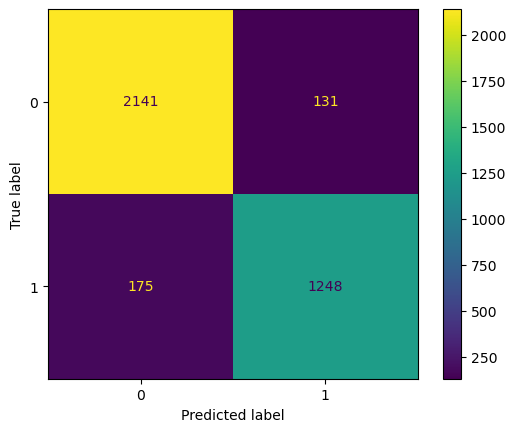

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Get the actual values and predicted values in array-like format
actual = y_test.values

predicted = xg_preds.values

# Generate a confusion matrix
confusion = confusion_matrix(actual, predicted, labels=xg_classifier.classes_) 

# Generate display for confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=xg_classifier.classes_)

display.plot()

print(len(incorrect_list))
print(len(predicted))


In [43]:
import shap

explainer = shap.TreeExplainer(classifier, x_test)
shap_values = explainer(x_test)

for row in incorrect_list:
    shap.plots.waterfall(shap_values[row])


 99%|===================| 4971/5010 [01:08<00:00]        

2505
[796, 2263]


'\nfor row in incorrect_list:\n    shap.plots.waterfall(shap_values[row])\n'

In [ ]:
# Create 100 models, train on 90% of dataset, find model with lowest score
for i in range(100):
    model = XGBClassifier()
    
# Go through each model, each datapoint, see how consistent the model is. 

